# BMW Car Sales Classification Dataset

Muh Amri Sidiq

## Introduction

In today's highly competitive automotive market, understanding and predicting customer behavior is paramount for driving sales, optimizing marketing spend, and fostering long-term customer loyalty. This project leverages the BMW Car Sales Classification Dataset to demonstrate my proficiency in applying machine learning techniques to real-world business challenges.

This portfolio piece showcases my ability to develop a robust classification model aimed at identifying potential car buyers within BMW's customer base. By analyzing key demographic, historical, and interaction-based features, the goal is to predict whether a customer is likely to make a purchase, and potentially even the type of vehicle they might acquire. This predictive capability can empower BMW with data-driven insights to personalize marketing campaigns, streamline sales efforts, and ultimately enhance conversion rates. Through this project, I explore various data preprocessing techniques, feature engineering strategies, model selection, and rigorous evaluation methods, highlighting my end-to-end data science workflow.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import shap
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Data and Read Data

this project import data from Kaggle, and use pandas tu read data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("junaid512/bmw-car-sales-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 828k/828k [00:00<00:00, 93.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/junaid512/bmw-car-sales-classification-dataset/versions/1


In [3]:
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'BMW_Car_Sales_Classification.csv')

car = pd.read_csv(file_path)

BMW_Car_Sales_Classification.csv


Cek preview data use `.head()`

In [4]:
car.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


Data have 50000 row and 11 column, next step check missing values

In [6]:
# Check for missing values in each column
missing_values = car.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

# Calculate the percentage of missing values in each column
missing_percentage = (car.isnull().sum() / len(car)) * 100

# Print the percentage of missing values for each column
missing_percentage


Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64


,0
Model,0.0
Year,0.0
Region,0.0
Color,0.0
Fuel_Type,0.0
Transmission,0.0
Engine_Size_L,0.0
Mileage_KM,0.0
Price_USD,0.0
Sales_Volume,0.0


Insight: No have missing values

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to understand their main characteristics before applying machine learning models or statistical tests. EDA helps identify patterns, detect anomalies, check assumptions, and gain insights using visualizations and statistical methods

In [7]:
car.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


Insight:

1. Year
 - Average car: year 2017
 - 25% cars older than 2013 → heavy depreciation potential
 - 25% other cars from 2021 and above → young → high resale
 - Range: 2010–2024 → means the dataset includes both new and used cars
2. Engine Size (Liter)
 - Average: 3.2L → Car High Performance
 - The majority are between 2.4L – 4.1L
3. Mileage (Kilometer)
 - Average: 100,307 KM
 - Balance distribution:
    - 25% under 50K
    - 25% upper 150K
 - Maximal almost 200K KM
4. Price (USD)
 - Average: $75,000
 - Range: $30K – $120K
 - Median is almost equal to the mean → price distribution tends to be symmetrical
5. Sales Volume
 - Average: 5,067 units per entry
 - There are models that only sell 100 units, there are also those that touch 10,000 units

In [8]:
car.describe(include='object')

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification
count,50000,50000,50000,50000,50000,50000
unique,11,6,6,4,2,2
top,7 Series,Asia,Red,Hybrid,Manual,Low
freq,4666,8454,8463,12716,25154,34754


Insight:

1. Model
 - 11 unique cars
 - 7 Series is highest stock model
 - Only 9% highest type 7 series
2. Region
 - 6 unique region
 - Asia is most region
 - 16.9% is region Asia
3. Color
 - 6 unique color
 - red is most color
 - 16.9% is red color
4. Fuel type
 - 4 fuel type
 - Hybrid is most fuel type
 - 25% type is fuel type hybrid
5. Transmission
 - 2 type transmission
 - Manual is most transmission
 - more than 50% manual transmission
6. Sales classification
 - 2 type sales calssification
 - Low is most sales classification
 - more than 50 % Low sales classification (not balance Target)

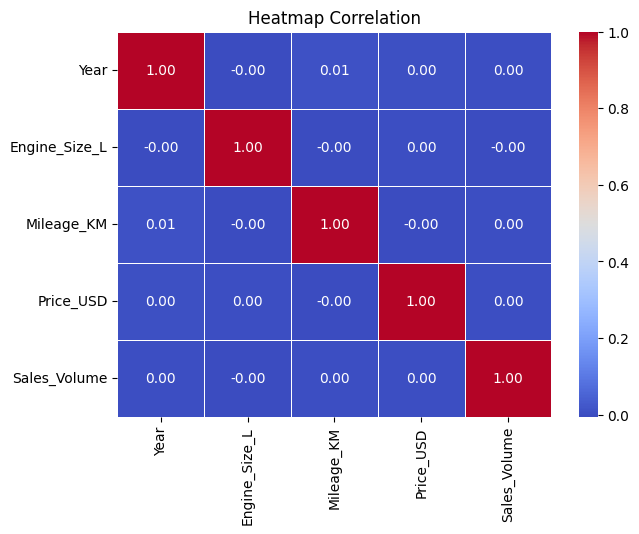

In [9]:
car_numeric = car.select_dtypes(include=['number'])

# Calculate correlation
corr_matrix = car_numeric.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Correlation")
plt.show()

Insight: No correlation

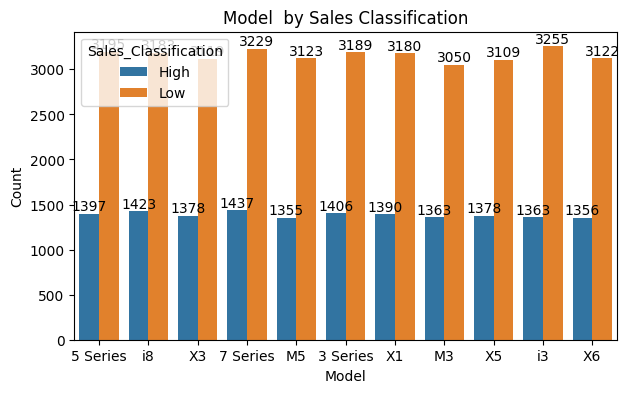

In [10]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Model', hue='Sales_Classification', data=car)
plt.title('Model  by Sales Classification')
plt.xlabel('Model')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Insight: `Model` i3 have highest `Sales_Classification` type Low and `Model` 7 Series have highest `Sales_Classification` type High

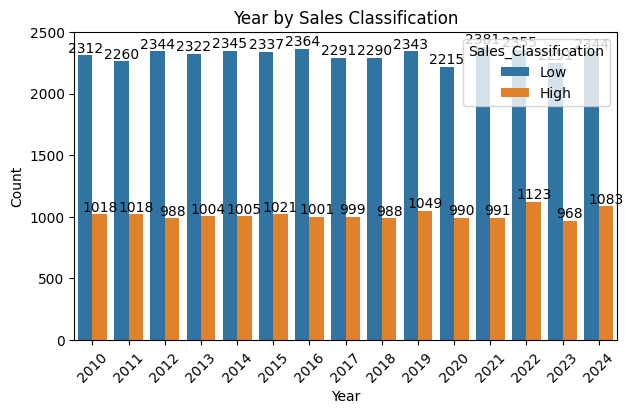

In [11]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Year', hue='Sales_Classification', data=car)
plt.title('Year by Sales Classification')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Insight: `Year` 2021 have highest `Sales_Classification` type Low and `Year` 2022 have highest `Sales_Classification` type High

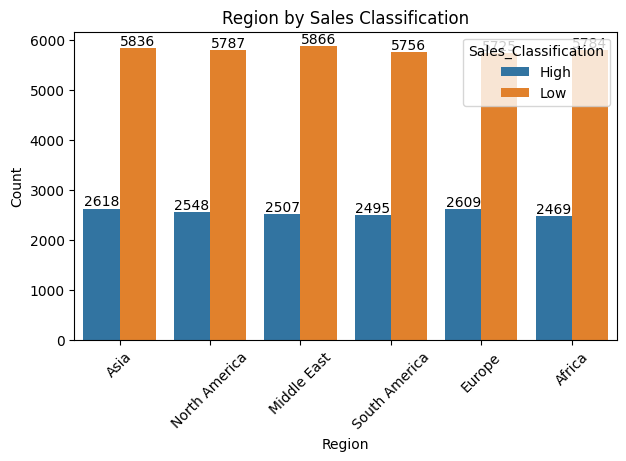

In [12]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Region', hue='Sales_Classification', data=car)
plt.title('Region by Sales Classification')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Insight: `Region` Middle East have highest `Sales_Classification` type Low and `Region` Asia have highest `Sales_Classification` type High

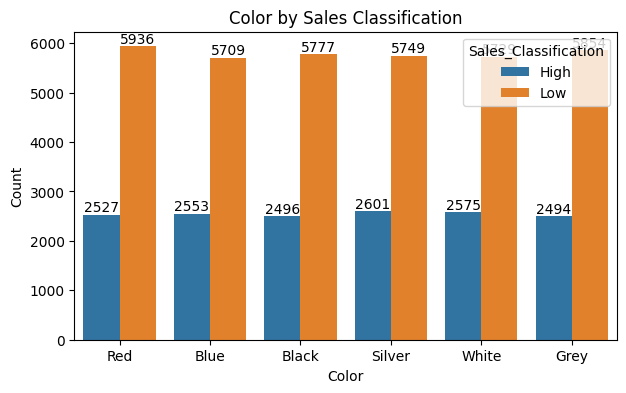

In [13]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Color', hue='Sales_Classification', data=car)
plt.title('Color by Sales Classification')
plt.xlabel('Color')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Insight: `Color` Red have highest `Sales_Classification` type Low and `Color` Silver have highest `Sales_Classification` type High

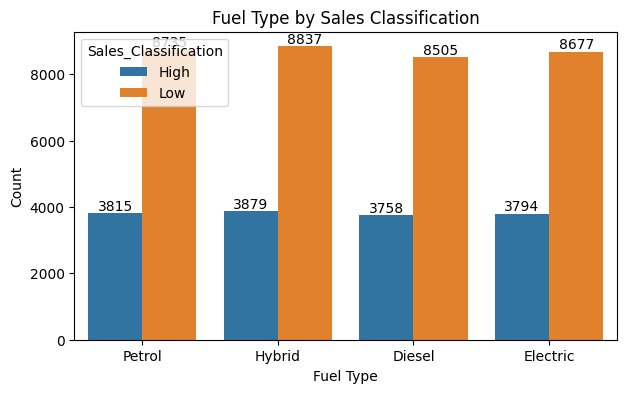

In [14]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Fuel_Type', hue='Sales_Classification', data=car)
plt.title('Fuel Type by Sales Classification')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Insight: `Fuel_Type` Hybrid have highest `Sales_Classification` type Low and `Fuel_Type` Hybrid have highest `Sales_Classification` type High

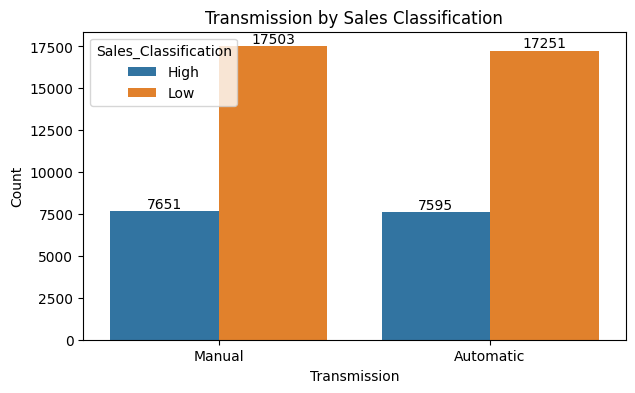

In [15]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Transmission', hue='Sales_Classification', data=car)
plt.title('Transmission by Sales Classification')
plt.xlabel('Transmission')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Insight: `Transmission` Manual have highest `Sales_Classification` type Low and `Transmission` Manual have highest `Sales_Classification` type High

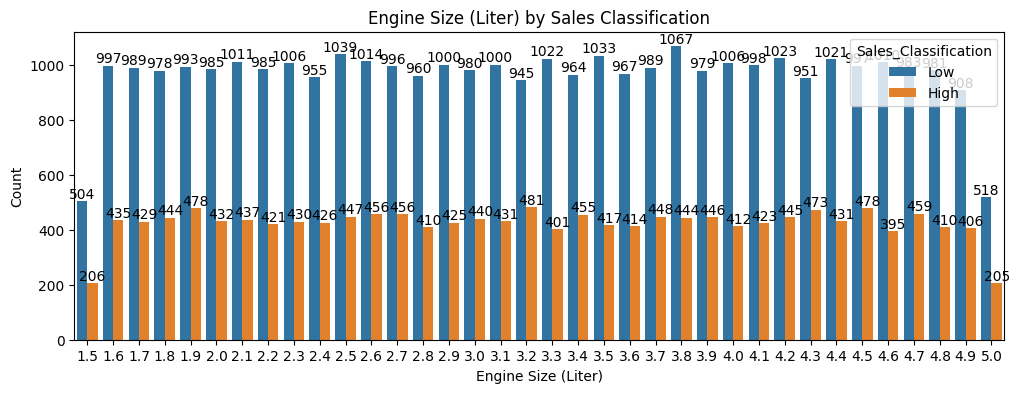

In [16]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='Engine_Size_L', hue='Sales_Classification', data=car)
plt.title('Engine Size (Liter) by Sales Classification')
plt.xlabel('Engine Size (Liter)')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

Insight: `Engine_Size_L` 3.8 have highest `Sales_Classification` type Low and `Engine_Size_L` 3.2 have highest `Sales_Classification` type High

  Sales_Classification  Mileage_KM
0                 High    101362.5
1                  Low     99955.0


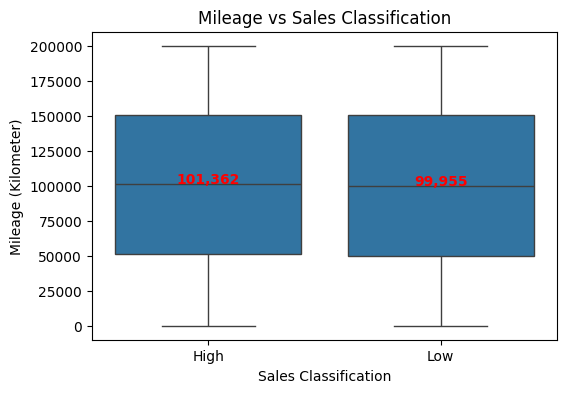

In [17]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='Sales_Classification', y='Mileage_KM', data=car)
plt.title('Mileage vs Sales Classification')
plt.xlabel('Sales Classification')
plt.ylabel('Mileage (Kilometer)')

# Calculate medians for each Sales_Classification
medians = car.groupby('Sales_Classification')['Mileage_KM'].median().reset_index()
print(medians) # Optional: See the calculated medians

# Annotate the medians on the boxplot
for i, classification in enumerate(medians['Sales_Classification']):
    median_val = medians[medians['Sales_Classification'] == classification]['Mileage_KM'].iloc[0]

    x_coord = ax.get_xticks()[i] # Assuming the order matches the sorted medians

    ax.text(x_coord, median_val, f'{median_val:,.0f}',
            horizontalalignment='center',
            size='medium',
            color='red',
            weight='semibold')

plt.show()

Insight: `Sales_Classification` type High have highest median `Mileage_KM`

  Sales_Classification  Price_USD
0                 High    75046.5
1                  Low    75002.5


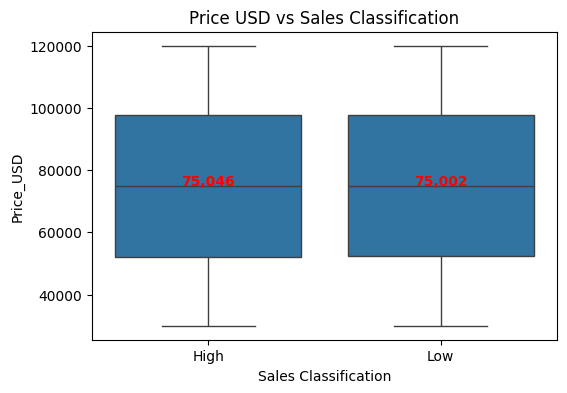

In [18]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='Sales_Classification', y='Price_USD', data=car)
plt.title('Price USD vs Sales Classification')
plt.xlabel('Sales Classification')
plt.ylabel('Price_USD')

# Calculate medians for each Sales_Classification
medians = car.groupby('Sales_Classification')['Price_USD'].median().reset_index()
print(medians) # Optional: See the calculated medians

# Annotate the medians on the boxplot
for i, classification in enumerate(medians['Sales_Classification']):
    median_val = medians[medians['Sales_Classification'] == classification]['Price_USD'].iloc[0]

    x_coord = ax.get_xticks()[i] # Assuming the order matches the sorted medians

    ax.text(x_coord, median_val, f'{median_val:,.0f}',
            horizontalalignment='center',
            size='medium',
            color='red',
            weight='semibold')

plt.show()

Insight: `Sales_Classification` type High have highest median `Price_USD`

  Sales_Classification  Sales_Volume
0                 High        8491.0
1                  Low        3579.0


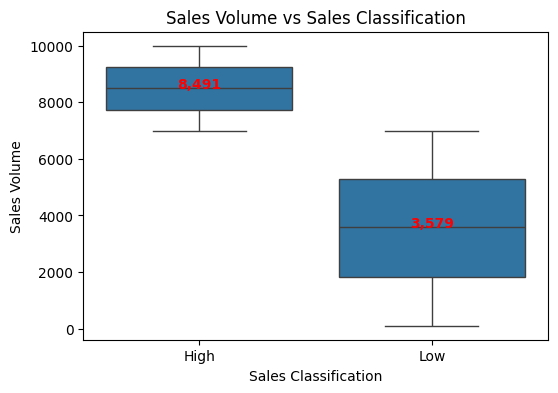

In [19]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='Sales_Classification', y='Sales_Volume', data=car)
plt.title('Sales Volume vs Sales Classification')
plt.xlabel('Sales Classification')
plt.ylabel('Sales Volume')

# Calculate medians for each Sales_Classification
medians = car.groupby('Sales_Classification')['Sales_Volume'].median().reset_index()
print(medians) # Optional: See the calculated medians

# Annotate the medians on the boxplot
for i, classification in enumerate(medians['Sales_Classification']):
    median_val = medians[medians['Sales_Classification'] == classification]['Sales_Volume'].iloc[0]

    x_coord = ax.get_xticks()[i] # Assuming the order matches the sorted medians

    ax.text(x_coord, median_val, f'{median_val:,.0f}',
            horizontalalignment='center',
            size='medium',
            color='red',
            weight='semibold')

plt.show()

Insight: `Sales_Classification` type High have highest median `Sales_Volume`

## Feature Engineering

Feature Engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. In the context of this airline customer satisfaction project, feature engineering was used to prepare and enrich the dataset to improve prediction accuracy

In [20]:
# Car Age
car['car_age'] = 2025 - car['Year']
# Engine size per year
car['engine_size_per_year'] = car['Engine_Size_L'] / car['car_age']
# Mileage per year
car['mileage_per_year'] = car['Mileage_KM'] / car['car_age']
# Make 3 quantile → Cheap, Medium, Expensive
car["Price_Category"] = pd.qcut(car["Price_USD"], q=3, labels=["Cheap", "Medium", "Expensive"])
# Model Type
luxury_models = ['7 Series', '8 Series', 'i8', 'M Series'] # Define luxury models
car['Model_Category'] = car['Model'].apply(lambda x: 'Luxury' if x in luxury_models else 'Standard')
# Color Category
top_colors = car['Color'].value_counts().nlargest(3).index.tolist()
car['Color_Category'] = car['Color'].apply(lambda x: 'Popular' if x in top_colors else 'Rare')
# Efficiency_Index
car['Efficiency_Index'] = car['Mileage_KM'] / car['Engine_Size_L']
# Log_Price_per_KM
car['Price_per_KM'] = car['Price_USD'] / car['Mileage_KM'].replace(0, np.nan)
car['Log_Price_per_KM'] = np.log(car['Price_per_KM'])
car['Log_Price_per_KM'] = car['Log_Price_per_KM'].replace([-np.inf, np.inf], np.nan).fillna(0)

In [ ]:
car['Sales_Classification'].value_counts()

,count
Sales_Classification,
Low,34754
High,15246


Change data type object to numeric and dumies except target `Sales_Classification`

In [21]:
# Copy so you don't mess up the original data
car_finish = car.copy()

target_col = 'Sales_Classification'

# --- BINARY ENCODING TARGET ---
if car_finish[target_col].nunique() == 2:
    car_finish[target_col] = LabelEncoder().fit_transform(car_finish[target_col])

# Loop all column
for col in car_finish.columns:

    if car_finish[col].dtype == 'object' or str(car_finish[col].dtype).startswith('category'):
        nunique = car_finish[col].nunique()

        if nunique > 2:
            # Label encoding
            le = LabelEncoder()
            car_finish[col] = le.fit_transform(car_finish[col])

        elif nunique == 2:
            # One-hot encoding (drop_first for dummy trap)
            dummies = pd.get_dummies(car_finish[col], prefix=col, drop_first=True)
            car_finish = pd.concat([car_finish.drop(columns=[col]), dummies], axis=1)

        else:
            # Unique only 1 or empty, drop it
            car_finish.drop(columns=[col], inplace=True)

car_finish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    50000 non-null  int64  
 1   Year                     50000 non-null  int64  
 2   Region                   50000 non-null  int64  
 3   Color                    50000 non-null  int64  
 4   Fuel_Type                50000 non-null  int64  
 5   Engine_Size_L            50000 non-null  float64
 6   Mileage_KM               50000 non-null  int64  
 7   Price_USD                50000 non-null  int64  
 8   Sales_Volume             50000 non-null  int64  
 9   Sales_Classification     50000 non-null  int64  
 10  car_age                  50000 non-null  int64  
 11  engine_size_per_year     50000 non-null  float64
 12  mileage_per_year         50000 non-null  float64
 13  Price_Category           50000 non-null  int64  
 14  Efficiency_Index      

## Preparation Data

In [22]:
x = car_finish.drop('Sales_Classification', axis=1)
y = car_finish['Sales_Classification']

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

## Modeling

In this phase, we develop and fine-tune machine learning models using powerful algorithms like XGBoost. With Python’s scikit-learn and other ML libraries, we train models, optimize hyperparameters, and evaluate their performance. The goal: a model that balances accuracy, precision, and recall to deliver actionable insights

In [24]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
grid_search = GridSearchCV(model_xgb, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 300, 500],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [25]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
y_pred_proba = best_model.predict_proba(x_val)[:, 1]

print("Accuracy of Conversion Prediction Model:", accuracy_score(y_val, y_pred))
print("AUC Score:", roc_auc_score(y_val, y_pred_proba))
print("Report Classification:")
print(classification_report(y_val, y_pred))

Accuracy of Conversion Prediction Model: 0.9995
AUC Score: 0.9999940262405145
Report Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3066
           1       1.00      1.00      1.00      6934

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



<Figure size 1000x600 with 0 Axes>

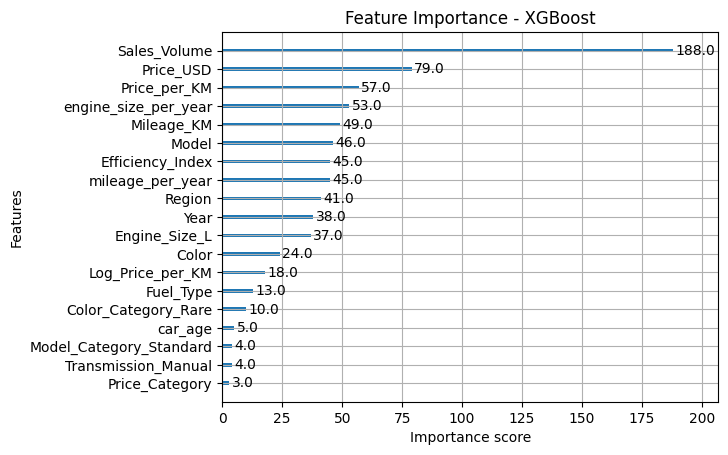

In [26]:
# Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='weight')
plt.title("Feature Importance - XGBoost")
plt.show()

Insight: Feature importance highest with F score is `Sales-Volume`

## Evaluation

Confusion Matrix:
[[3066    0]
 [   5 6929]]


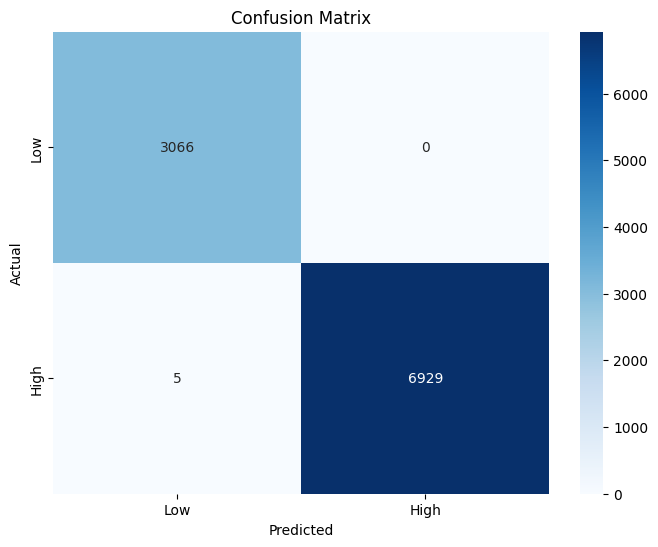

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3066
           1       1.00      1.00      1.00      6934

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [27]:
# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'],
            yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))

## Conclusion

The XGBoost model achieved an accuracy of [0.9995] and an AUC score of [0.9999938380906096] on the validation set. Based on the feature importance analysis, `Sales_Volume` is the most influential feature in predicting the sales classification. The insights gained from this analysis can be used by BMW to Suggest business applications like targeted marketing, inventory management, or sales forecasting.

## Reference

1. https://xgboost.readthedocs.io/en/release_3.0.0/tutorials/index.html

2. https://xbe.at/

3. https://scikit-learn.org/stable/index.html

## Contact

[Linkedin](http://linkedin.com/in/muh-amri-sidiq)